In [10]:
%matplotlib ipympl

In [11]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
import scipy
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt


In [12]:
@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMlinNew(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    t12=R1/R2
    Rion1=R1
    wclin=1/(Rion1*Q)
    S=np.sqrt(1j*omega/wclin)

    Z = (2*R1/S)*(scipy.special.iv(1/3, -2/3*(S*(t12**(-1/2)/(t12-1))))*scipy.special.iv(2/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1)))*scipy.special.iv(-2/3, -2/3*(t12*S/(t12-1))))/((scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1))))*scipy.special.iv(1/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(1/3, -2/3*(S*t12**(-1/2)/(t12-1)))*scipy.special.iv(-1/3, -2/3*(t12*S/(t12-1))))
    return Z

@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMlinzertNew(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    tlin1=R1
    tlin2=R2
    eps=(tlin2-tlin1)/tlin1
    S=np.sqrt((R1*Q*omega*1j))

    Z=2*(R1)*((np.exp(2*S)+1)**2
        /(eps*(S**2+0.5)*np.exp(2*S)+(-eps/4+S)*np.exp(4*S)-eps/4-S))
    
    return Z

@element(num_params=3, units=["Ohm", "Ohm", "F"],overwrite=True)
def TLMlinsemiNew(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, R2, Q = p[0], p[1], p[2]
    tlin1=R1
    tlin2=R2
    t12=tlin1/tlin2
    Rion1=R1
    Rion2=R2
    wclin1=1/(Rion1*Q)
    wclin2=1/(Rion2*Q)
    S1=np.sqrt(1j*omega/wclin1)
    kk=-(2/3)*t12*S1/(t12-1)

    Z = (2*R1/S1)*(scipy.special.iv(-2/3,kk)-scipy.special.iv(2/3,kk))/(scipy.special.iv(-1/3,kk)-scipy.special.iv(1/3,kk))
    
    return Z

In [13]:
Rref=194.56
t1=6.26
R1=Rref*t1
t2=2 
R2=Rref*t2
Q=6.61e-4
initial_guess=[194.56*4,194.56*2,6.61e-4]
tlmlin=CustomCircuit(initial_guess=[194.56*4,194.56*2,6.61e-4],circuit='TLMlinNew_0')
tlmlin_zert=CustomCircuit(initial_guess=[194.56*4,194.56*2,6.61e-4],circuit='TLMlinzertNew_0')
tlmlin_semi=CustomCircuit(initial_guess=initial_guess,circuit='TLMlinsemiNew_0')

In [14]:
f_pred = np.logspace(-3,5,num=50)
tlmlin_pred = tlmlin.predict(f_pred)
tlmlin_zert_pred=tlmlin_zert.predict(f_pred)
tlmlin_semi_pred=tlmlin_semi.predict(f_pred)

C:\Users\Gaming\AppData\Local\Temp\ipykernel_24236\4065092232.py:10: RuntimeWarning: overflow encountered in multiply
  Z = (2*R1/S)*(scipy.special.iv(1/3, -2/3*(S*(t12**(-1/2)/(t12-1))))*scipy.special.iv(2/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1)))*scipy.special.iv(-2/3, -2/3*(t12*S/(t12-1))))/((scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1))))*scipy.special.iv(1/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(1/3, -2/3*(S*t12**(-1/2)/(t12-1)))*scipy.special.iv(-1/3, -2/3*(t12*S/(t12-1))))
C:\Users\Gaming\AppData\Local\Temp\ipykernel_24236\4065092232.py:10: RuntimeWarning: invalid value encountered in subtract
  Z = (2*R1/S)*(scipy.special.iv(1/3, -2/3*(S*(t12**(-1/2)/(t12-1))))*scipy.special.iv(2/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1)))*scipy.special.iv(-2/3, -2/3*(t12*S/(t12-1))))/((scipy.special.iv(-1/3, -2/3*(S*t12**(-1/2)/(t12-1))))*scipy.special.iv(1/3, -2/3*(t12*S/(t12-1)))-scipy.special.iv(1/3, -2/3*(S*t12**

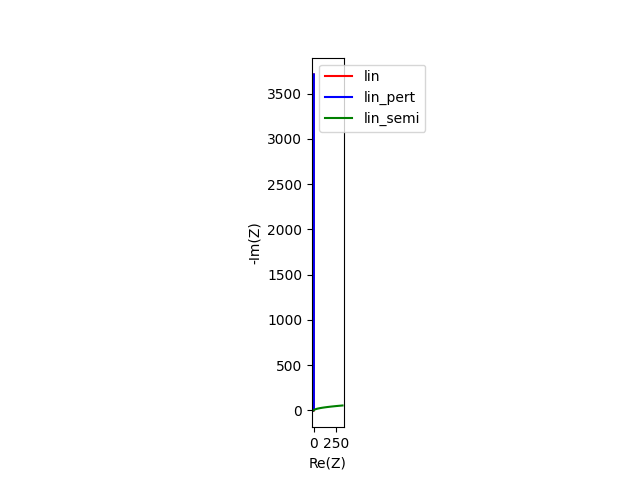

In [15]:
ax= plt.figure().add_subplot()
ax.plot(np.real(tlmlin_pred/(194.56/1.5)),-np.imag(tlmlin_pred/(194.56/1.5)),"r",label="lin")
ax.plot(np.real(tlmlin_zert_pred/(194.56/1.5)),-np.imag(tlmlin_zert_pred/(194.56/1.5)),"b",label="lin_pert")
ax.plot(np.real(tlmlin_semi_pred)/(194.56/1.5),-np.imag(tlmlin_semi_pred)/(194.56/1.5),"g",label="lin_semi")
ax.legend()
ax.set_xlabel("Re(Z)")
ax.set_ylabel("-Im(Z)")
ax.set_aspect("equal")
#ax.set_xlim(-6,6)
#ax.set_ylim(0,1000)

In [16]:
#fitted_lin_on_lin=tlmlin_guess.fit(f_pred,tlmlin_pred,weight_by_modulus=False)
#print(fitted_lin_on_lin)